In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix




In [3]:
# loading the dataset
df = pd.read_csv("churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Cleaning the data
df = df.drop("TotalCharges", axis = 1)

df.SeniorCitizen = df.SeniorCitizen.apply(lambda x: 'No' if x==0 else 'Yes')

In [6]:
# Drop the column 'customerID'
df = df.drop('customerID',axis=1)

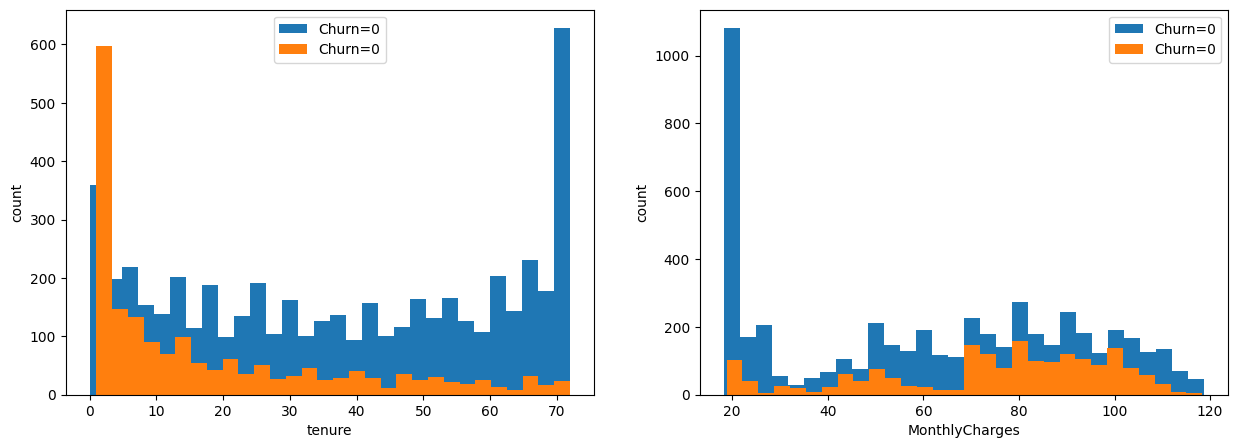

In [ ]:
# Include the columns which gives the continuous values
# creating list

cvars = [i for i in df.columns if df[i].dtypes != 'object']
fig, ax = plt.subplots(1,2,figsize=(15,5))

for i,x in enumerate(cvars):
  ax[i].hist(df[x][df.Churn=='No'],label='Churn=0', bins = 30)
  ax[i].hist(df[x][df.Churn=='Yes'],label='Churn=0', bins = 30)
  ax[i].set(xlabel=x,ylabel='count')
  ax[i].legend()



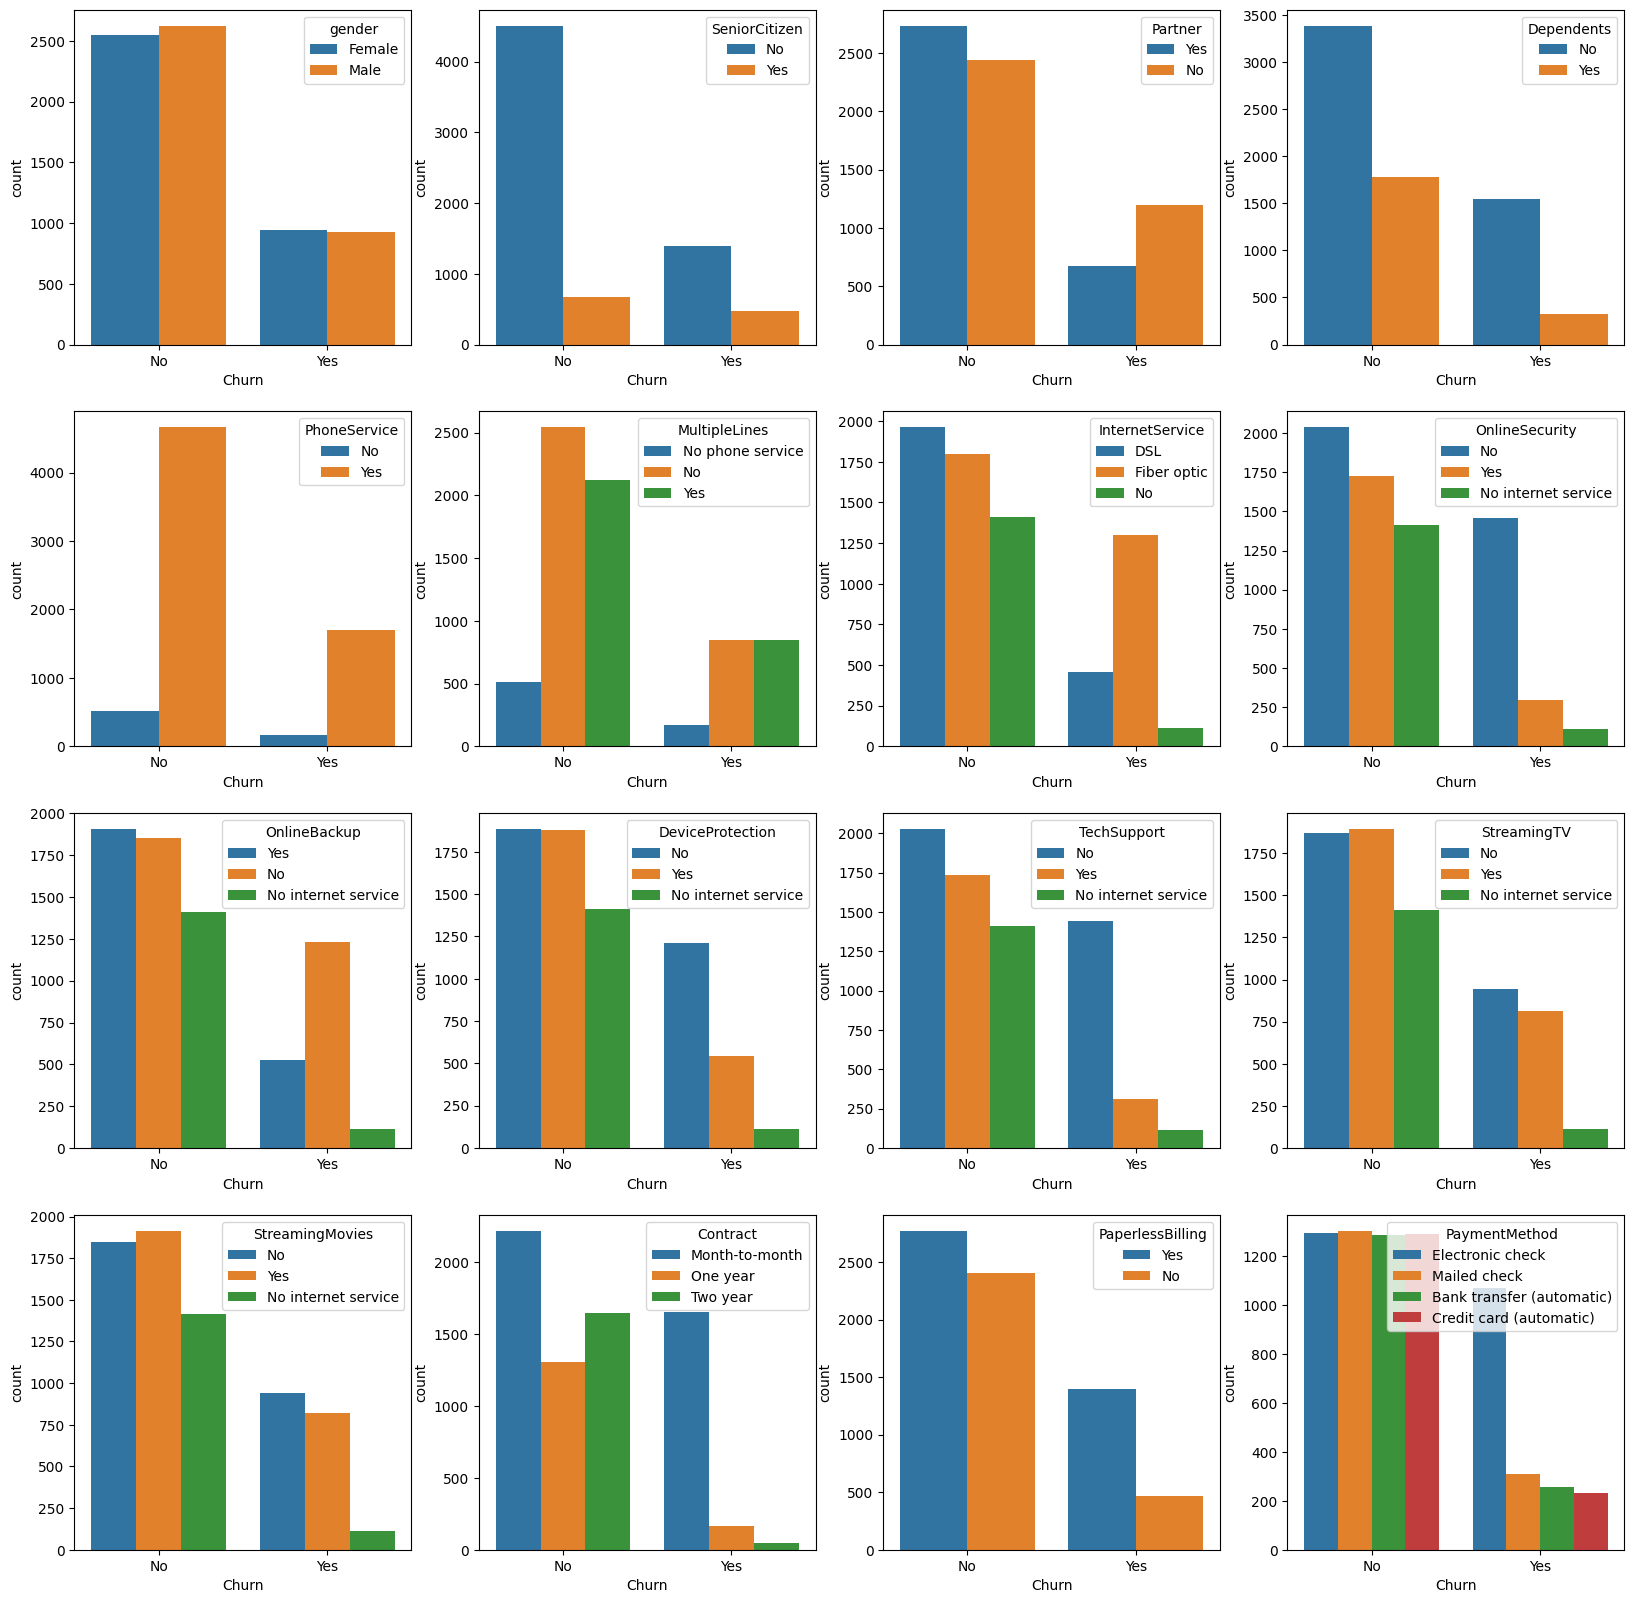

In [ ]:
# categorical data
categorical_var = [i for i in df.columns if df[i].dtypes=='object']
catVars_noChurn = categorical_var[:-1]
fig,ax = plt.subplots(4,4, figsize = (20,20))
for axi, var in zip(ax.flat,catVars_noChurn):
  sns.countplot(x=df.Churn, hue=df[var], ax=axi)

In [ ]:
# Encoding the data
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
  print(x,df[x].unique())
  df[x] = le.fit_transform(df[x])

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [ ]:
df = pd.get_dummies(df, columns = [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Splitting and Training the data
X = df.drop('Churn',axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1298
           1       0.59      0.46      0.51       463

    accuracy                           0.77      1761
   macro avg       0.70      0.67      0.68      1761
weighted avg       0.76      0.77      0.76      1761



Text(50.722222222222214, 0.5, 'Predicted')

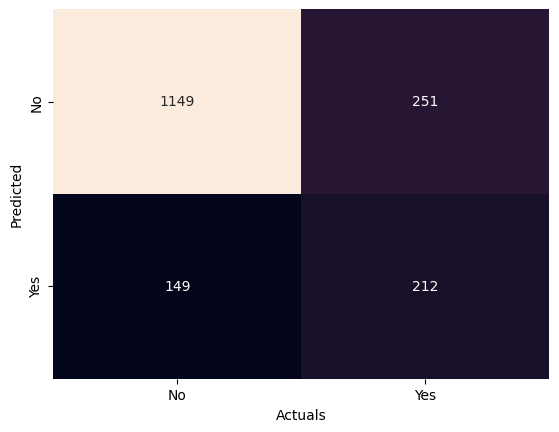

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt = 'd', cbar=False,
            xticklabels = ['No','Yes'],
            yticklabels = ['No','Yes'])
plt.xlabel('Actuals')
plt.ylabel('Predicted')

In [ ]:
# Creating feature importance
feature_importance = np.array(rf_classifier.feature_importances_)
feature_names = np.array(X.columns)

feat_imp=pd.DataFrame({'Feature_names':feature_names,'features_importance':feature_importance})

<Axes: xlabel='features_importance', ylabel='Feature_names'>

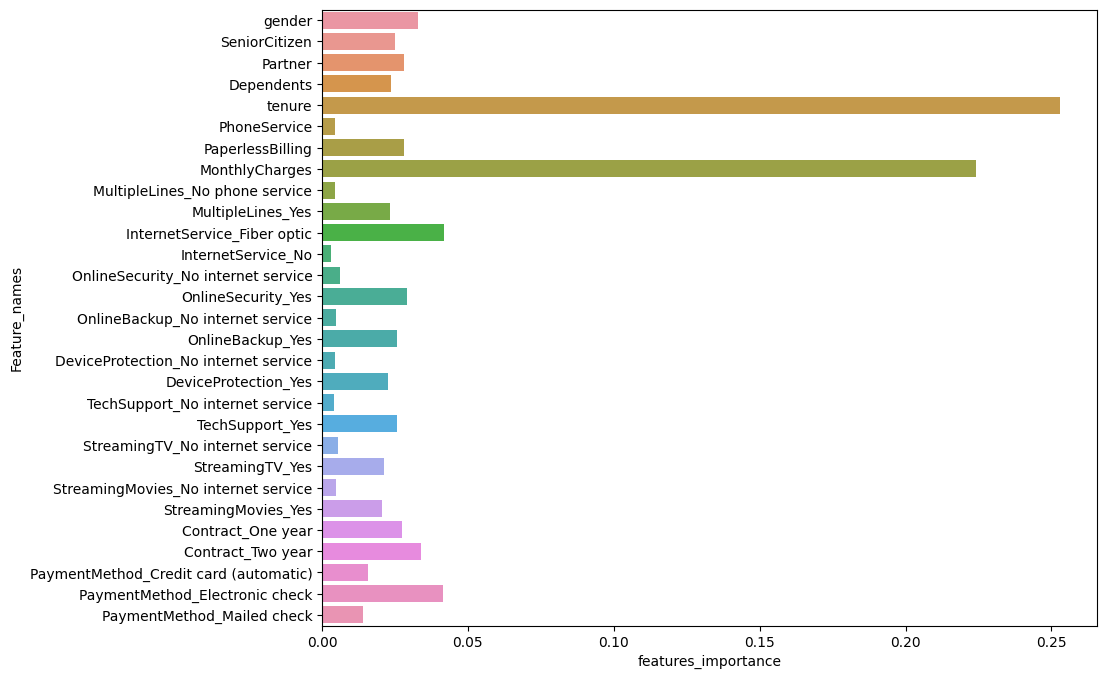

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp['features_importance'],y=feat_imp['Feature_names'])